<a href="https://colab.research.google.com/github/alvinwalker314/DS-Unit-2-Regression-1/blob/master/Alvin_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install category_encoders

In [0]:
import category_encoders as ce
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
sample_sub= pd.read_csv('https://raw.githubusercontent.com/alvinwalker314/DS-Unit-2-Classification-1/master/sample_submission.csv')
test_features= pd.read_csv('https://raw.githubusercontent.com/alvinwalker314/DS-Unit-2-Classification-1/master/test_features.csv')
train_features= pd.read_csv('https://raw.githubusercontent.com/alvinwalker314/DS-Unit-2-Classification-1/master/train_features.csv')
train_labels= pd.read_csv('https://raw.githubusercontent.com/alvinwalker314/DS-Unit-2-Classification-1/master/train_labels.csv')
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
sample_sub.shape, test_features.shape, train_features.shape, train_labels.shape

((14358, 2), (14358, 40), (59400, 40), (59400, 2))

In [0]:
#Split training data
X_train= train_features
y_train= train_labels['status_group']

X_train, X_test, y_train, y_test= train_test_split(
    X_train, y_train, train_size=0.80, test_size=0.20,random_state= 20, stratify= y_train)


In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((47520, 40), (11880, 40), (47520,), (11880,))

In [0]:
#numeric features
X_train_numeric= X_train.select_dtypes('number')
X_test_numeric= X_test.select_dtypes('number')

In [8]:
#drop numerics i dont need
X_train_numeric.drop(columns=['id', 'num_private', 'latitude', 'construction_year', 'population'], inplace=True)
X_test_numeric.drop(columns=['id', 'num_private', 'latitude', 'construction_year', 'population'], inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [9]:
X_train_numeric.shape, X_test_numeric.shape

((47520, 5), (11880, 5))

In [0]:
#standarize features
scaler=StandardScaler()
X_train_scaled= scaler.fit_transform(X_train_numeric)
X_test_scaled= scaler.transform(X_test_numeric)

In [11]:
X_train_scaled.shape, X_test_scaled.shape

((47520, 5), (11880, 5))

In [12]:
#model with standarized numeric features
model= LogisticRegression(solver='lbfgs', multi_class= 'auto', max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred= model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.5573232323232323

In [0]:
#coefs
functional_coef= pd.Series(model.coef_[0], X_train_numeric.columns)
non_functional_coef= pd.Series(model.coef_[1], X_train_numeric.columns)
needs_repairs_coef= pd.Series(model.coef_[2], X_train_numeric.columns)

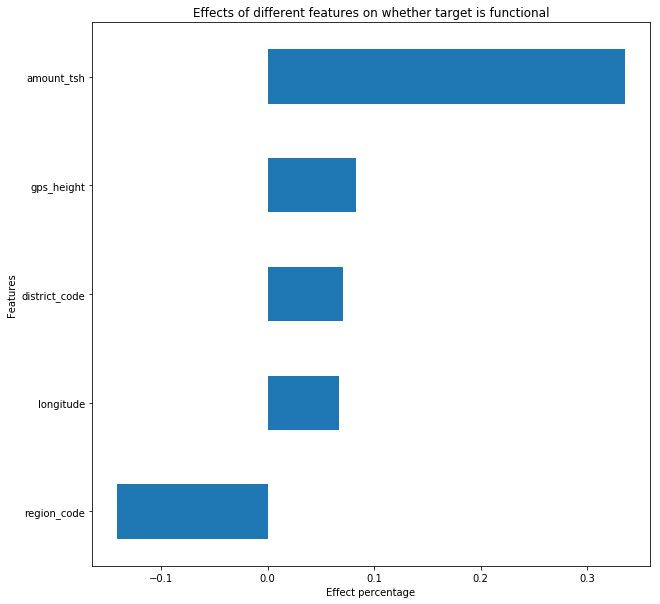

In [14]:
#plotting coef for functional
fig= plt.figure(figsize=(10,10))
functional_coef.sort_values().plot.barh();
plt.xlabel('Effect percentage')
plt.ylabel('Features')
plt.title('Effects of different features on whether target is functional');

In [0]:
#plotting coef for not functional
fig= plt.figure(figsize=(10,10))
non_functional_coef.sort_values().plot.barh();
plt.xlabel('Effect percentage')
plt.ylabel('Features')
plt.title('Effects of different features on whether target is not functional');

In [0]:
#plotting coef for needs repairs
fig= plt.figure(figsize=(10,10))
needs_repairs_coef.sort_values().plot.barh();
plt.xlabel('Effect percentage')
plt.ylabel('Features')
plt.title('Effects of different features on whether target is functional but needs repairs');


In [0]:
#grab categorial features
X_train_cat= X_train.select_dtypes(exclude='number')
X_test_cat= X_test.select_dtypes(exclude='number')
test_features= test_features.select_dtypes(exclude='number')

In [0]:
#drop columns i dont need
X_train_cat= X_train_cat.drop(columns= ['lga', 'date_recorded', 'funder', 'installer', 'ward', 'scheme_name', 'subvillage', 'wpt_name'])
X_test_cat= X_test_cat.drop(columns= ['lga', 'date_recorded', 'funder', 'installer', 'ward', 'scheme_name', 'subvillage', 'wpt_name'])
test_features= test_features.drop(columns= ['lga', 'date_recorded', 'funder', 'installer', 'ward', 'scheme_name', 'subvillage', 'wpt_name'])

In [0]:
#use one hot encoding on categorical features that are left
encoder= ce.OneHotEncoder(use_cat_names=True)
X_train_encoded= encoder.fit_transform(X_train_cat)
X_test_encoded= encoder.transform(X_test_cat)
test_features_encoded= encoder.transform(test_features)

In [22]:
X_train_encoded.shape, X_test_encoded.shape, test_features_encoded.shape

((47520, 175), (11880, 175), (14358, 175))

In [18]:
#model with one hot encoded categorical features
model= LogisticRegression(solver='lbfgs', multi_class= 'auto', max_iter=1000)
model.fit(X_train_encoded, y_train)
y_pred= model.predict(X_test_encoded)
accuracy_score(y_test, y_pred)

0.7328282828282828

In [0]:
#predicting test_features
y_pred= model.predict(test_features_encoded)

In [0]:
#placing my predictions in sample sub
sample_sub['status_group']= y_pred

In [22]:
#checking out amounts
sample_sub['status_group'].value_counts()

functional                 9729
non functional             4546
functional needs repair      83
Name: status_group, dtype: int64

In [0]:
sample_sub.to_csv('sample_sub.csv', index=False)

In [0]:
files.download('sample_sub.csv')

In [0]:
#coef for encoded features
functional_coef= pd.Series(model.coef_[0], X_train_encoded.columns)
non_functional_coef= pd.Series(model.coef_[1], X_train_encoded.columns)
needs_repairs_coef= pd.Series(model.coef_[2], X_train_encoded.columns)

In [0]:
#combined catergorical and numeric features
X_train_final= pd.concat([X_train_encoded,X_train_numeric], axis=1)
X_test_final= pd.concat([X_test_encoded, X_test_numeric],axis=1)

In [0]:
#standardized the data
scaler= StandardScaler()
X_train_final_scaled= scaler.fit_transform(X_train_final)
X_test_final_scaled= scaler.transform(X_test_final)


In [35]:
X_train_final_scaled.shape, X_test_final_scaled.shape

((47520, 180), (11880, 180))

In [40]:
#model with numeric and catergorical features
model= LogisticRegression(solver='lbfgs', multi_class= 'auto', max_iter=1000)
model.fit(X_train_final_scaled, y_train)
y_pred= model.predict(X_test_final_scaled)
accuracy_score(y_test, y_pred)

0.734006734006734

In [2]:
X_train= X_train.select_dtypes(exclude='number')
X_test= X_test.select_dtypes(exclude='number')
X_train.describe()

NameError: ignored

In [1]:
encoder= ce.OneHotEncoder()

X_train= encoder.fit_transform(X_train)
X_test= encoder.transform(X_test)


NameError: ignored